In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Load dataframes
snap_df = pd.read_csv('snap-annualsummary-11.csv')
insecurity_df = pd.read_csv('insecure.csv')

In [21]:
# Load the first sheet of the Excel file into a DataFrame, skipping the first 4 rows
poverty_df = pd.read_excel('PovertyEstimates.xlsx', sheet_name=0, skiprows=4)

# Keep only specified columns
cols_to_keep = ['Stabr', 'POVALL_2021', 'PCTPOVALL_2021', 'POV017_2021', 'PCTPOV017_2021',
                'POV517_2021', 'PCTPOV517_2021', 'MEDHHINC_2021', 'POV04_2021', 'PCTPOV04_2021']
poverty_df = poverty_df[cols_to_keep]

# Rename column
poverty_df = poverty_df.rename(columns={'Stabr': 'State'})

# Insert 'Year' column at index 1
poverty_df.insert(1, 'Year', 2021)

# 2. Drop row where Stabr = 'US'
poverty_df = poverty_df[poverty_df.State != 'US']

# 3. Keep only first instance of each Stabr
poverty_df.drop_duplicates(subset='State', keep='first', inplace=True)


In [22]:
poverty_df.head(10)

State  Year  POVALL_2021  PCTPOVALL_2021  POV017_2021  PCTPOV017_2021  \
1      AL  2021     800848.0            16.3     250327.0            22.7   
69     AK  2021      77736.0            10.8      23760.0            13.5   
100    AZ  2021     919680.0            12.9     281696.0            17.8   
116    AR  2021     471195.0            16.0     150353.0            21.8   
192    CA  2021    4742405.0            12.3    1362903.0            15.8   
251    CO  2021     554126.0             9.7     144163.0            11.8   
316    CT  2021     355861.0            10.1      93263.0            12.9   
325    DE  2021     113026.0            11.5      33302.0            16.2   
329    DC  2021     107307.0            16.8      31194.0            25.5   
331    FL  2021    2830813.0            13.2     774679.0            18.4   

     POV517_2021  PCTPOV517_2021  MEDHHINC_2021  POV04_2021  PCTPOV04_2021  
1       176596.0            21.6        53990.0     71220.0           25.1  
69       16316.0            12.7        78437.0      6633.0           14.1  
100     197841.0            16.7        68967.0     76649.0           19.7  
116     102718.0            20.1        52577.0     45096.0           25.5  
192     993484.0            15.4        84831.0    339169.0           15.8  
251      99663.0            10.9        82228.0     39308.0           12.8  
316      66642.0            12.2        83628.0     24150.0           13.9  
325      23013.0            15.0        71636.0      9694.0           18.6  
329      21233.0            25.5        91072.0      9444.0           24.3  
331     545090.0            17.5        63054.0    212346.0           19.8

In [5]:
# Convert columns to numeric (remove commas and convert to float)
snap_df['Total Benefits (Dollars)'] = snap_df['Total Benefits (Dollars)'].replace('[\$,]', '', regex=True).astype(float)
snap_df['All Other Costs (Dollars)'] = snap_df['All Other Costs (Dollars)'].replace('[\$,]', '', regex=True).astype(float)
insecurity_df['Overall Food Insecurity Rate'] = insecurity_df['Overall Food Insecurity Rate'].str.rstrip('%').astype('float') / 100.0


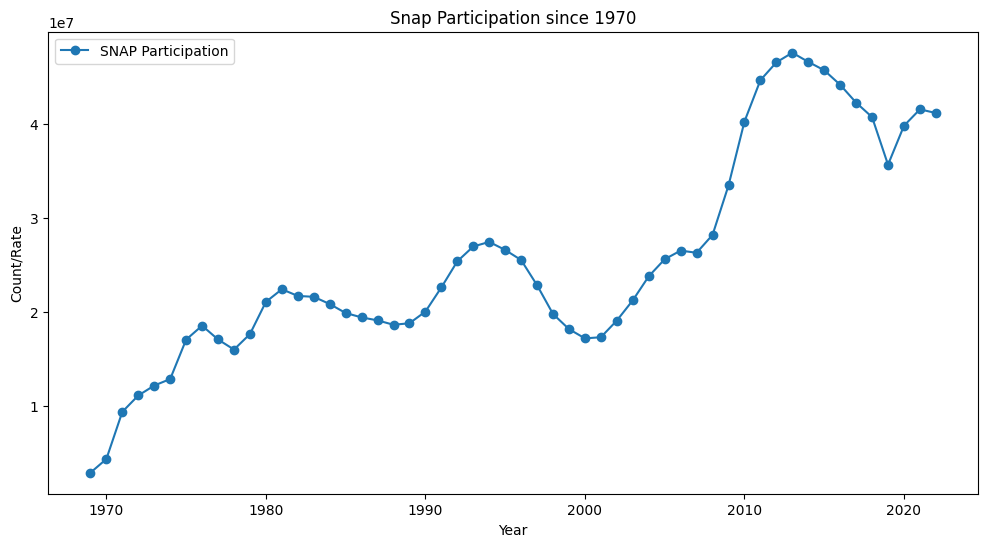

In [17]:
# Visualization 1: Correlation between Poverty and Food Insecurity
plt.figure(figsize=(12, 6))

# Line chart for SNAP Participation
plt.plot(snap_df['Fiscal Year'], snap_df['Average Participation'], label='SNAP Participation', marker='o')

plt.title('Snap Participation since 1970')
plt.xlabel('Year')
plt.ylabel('Count/Rate')
plt.legend()
plt.show()


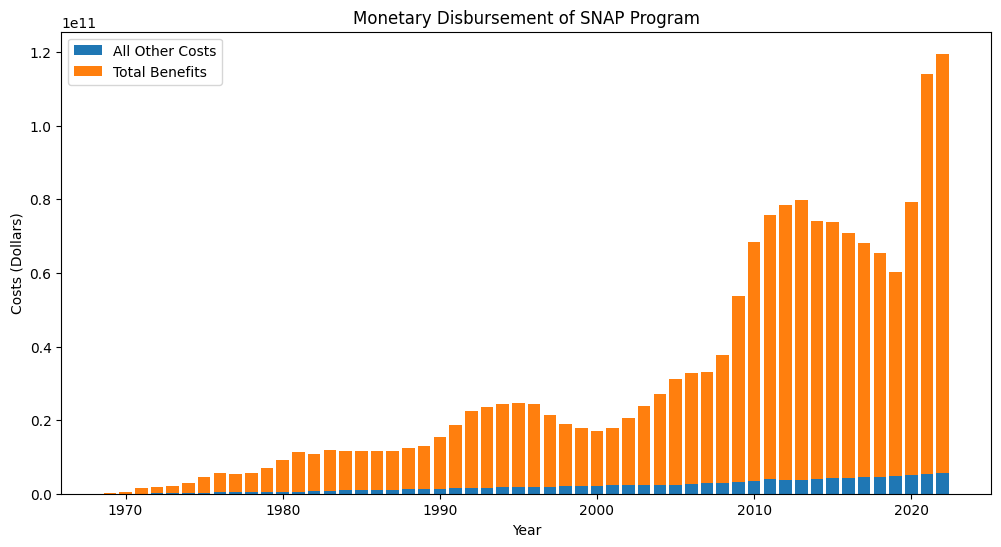

In [18]:
# Visualization 2: Impact of SNAP Program on Poverty
plt.figure(figsize=(12, 6))

# Stacked bar chart for Total Costs
plt.bar(snap_df['Fiscal Year'], snap_df['All Other Costs (Dollars)'], label='All Other Costs')
plt.bar(snap_df['Fiscal Year'], snap_df['Total Benefits (Dollars)'], bottom=snap_df['All Other Costs (Dollars)'],
        label='Total Benefits')

plt.title('Monetary Disbursement of SNAP Program')
plt.xlabel('Year')
plt.ylabel('Costs (Dollars)')
plt.legend()
plt.show()


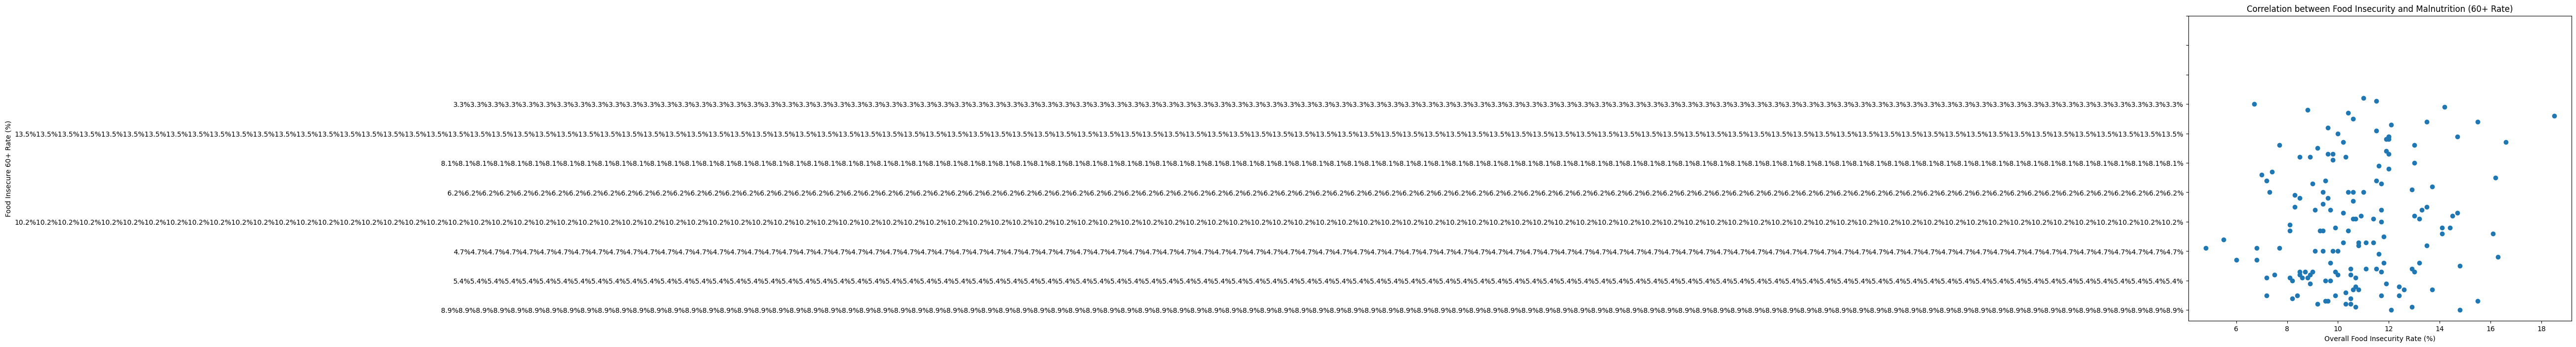

In [12]:
plt.figure(figsize=(10, 8))

# Scatter plot for Overall Food Insecurity Rate vs. Food Insecure 60+ Rate
plt.scatter(insecurity_df['Overall Food Insecurity Rate']*100, insecurity_df['Food Insecure 60+ Rate']*100)
plt.title('Correlation between Food Insecurity and Malnutrition (60+ Rate)')
plt.xlabel('Overall Food Insecurity Rate (%)')
plt.ylabel('Food Insecure 60+ Rate (%)')

# Customize y-axis ticks
plt.yticks(range(0, 101, 10))

plt.show()



TypeError: only size-1 arrays can be converted to Python scalars

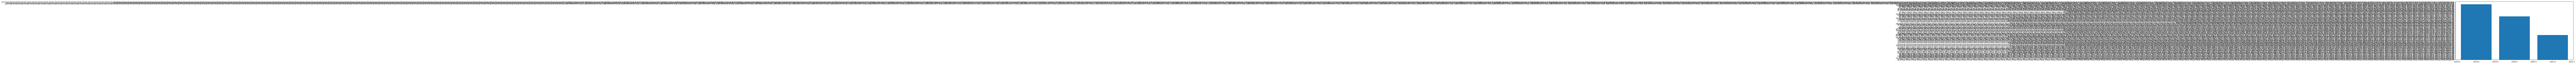

In [13]:
plt.figure(figsize=(12, 6))

# Bar chart for Food Insecurity Rates in different age groups
plt.bar(insecurity_df['Year'], insecurity_df['Food Insecure <18 Rate']*100, label='<18')
plt.bar(insecurity_df['Year'], insecurity_df['Food Insecure 18 - 50 Rate']*100,
        bottom=insecurity_df['Food Insecure <18 Rate']*100, label='18-50')
plt.bar(insecurity_df['Year'], insecurity_df['Food Insecure 50+ Rate']*100,
        bottom=(insecurity_df['Food Insecure <18 Rate'] + insecurity_df['Food Insecure 18 - 50 Rate'])*100, label='50+')

plt.title('Impact on Children Maturing into Adults')
plt.xlabel('Year')
plt.ylabel('Food Insecurity Rate (%)')
plt.legend()

# Customize y-axis ticks
plt.yticks(range(0, 101, 10))

plt.show()


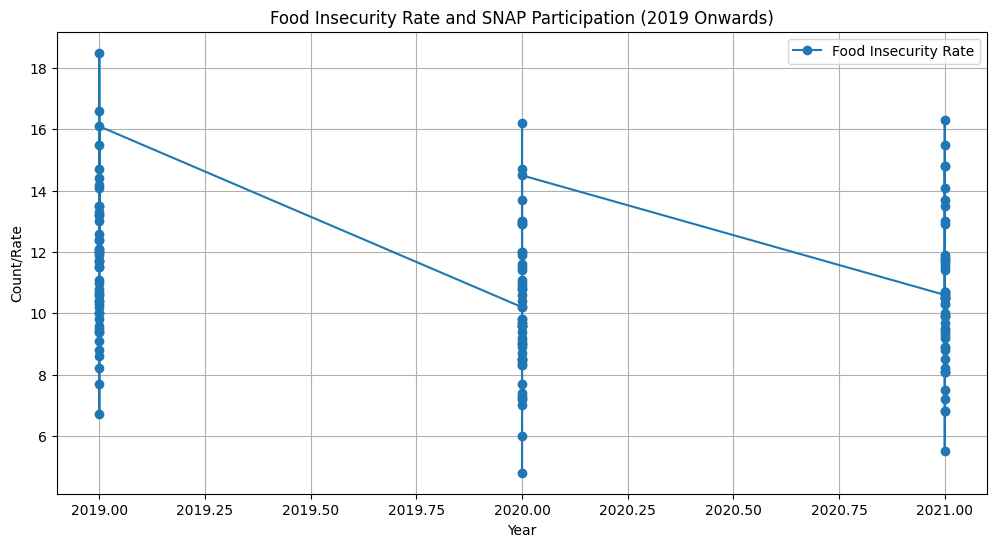

In [20]:
import matplotlib.pyplot as plt

# Assuming snap_df and insecurity_df are already loaded

# Filter data for years 2019 onwards
snap_subset = snap_df[snap_df['Fiscal Year'] >= 2019]
insecurity_subset = insecurity_df[insecurity_df['Year'] >= 2019]

# Create a combined line chart
plt.figure(figsize=(12, 6))


# Line chart for Overall Food Insecurity Rate
plt.plot(insecurity_subset['Year'], insecurity_subset['Overall Food Insecurity Rate']*100, label='Food Insecurity Rate', marker='o')

plt.title('Food Insecurity Rate and SNAP Participation (2019 Onwards)')
plt.xlabel('Year')
plt.ylabel('Count/Rate')
plt.legend()
plt.grid(True)
plt.show()


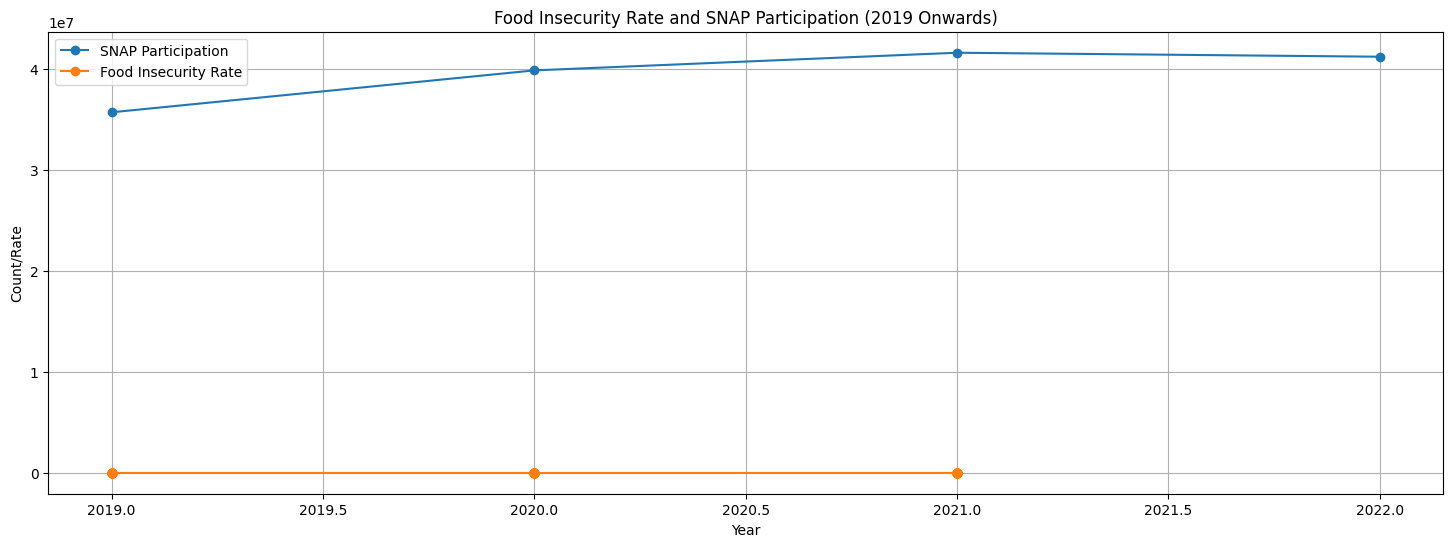

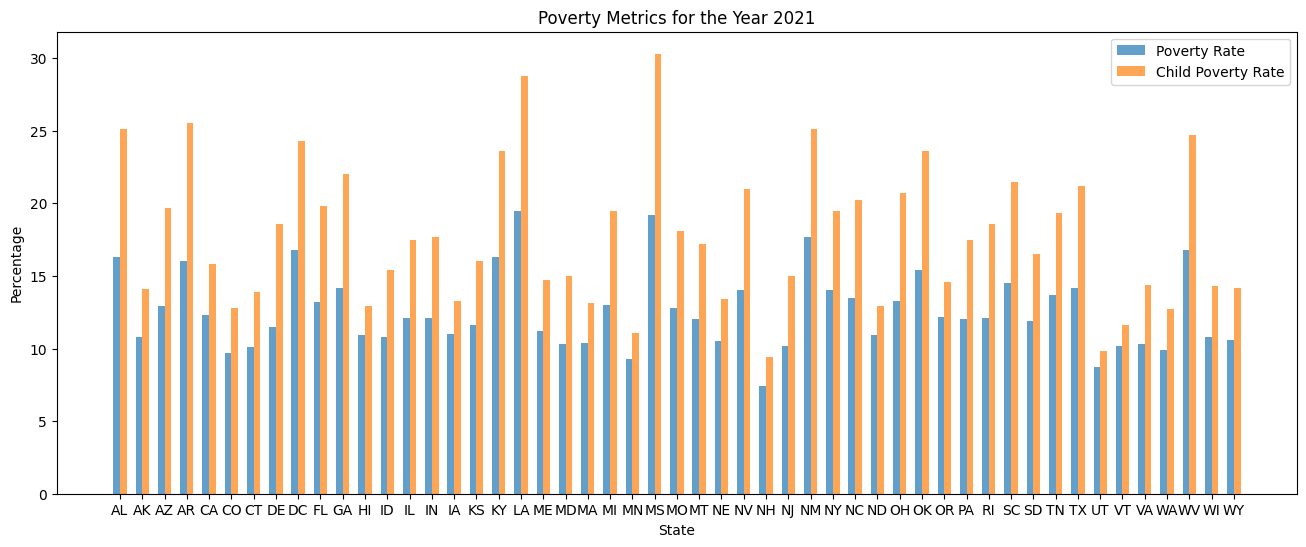

In [26]:
# Filter data for years 2019 onwards
snap_subset = snap_df[snap_df['Fiscal Year'] >= 2019]
insecurity_subset = insecurity_df[insecurity_df['Year'] >= 2019]

# Create a combined line chart for SNAP Participation and Food Insecurity Rate
plt.figure(figsize=(18, 6))

# Line chart for SNAP Participation
plt.plot(snap_subset['Fiscal Year'], snap_subset['Average Participation'], label='SNAP Participation', marker='o')

# Line chart for Overall Food Insecurity Rate
plt.plot(insecurity_subset['Year'], insecurity_subset['Overall Food Insecurity Rate']*100, label='Food Insecurity Rate', marker='o')

plt.title('Food Insecurity Rate and SNAP Participation (2019 Onwards)')
plt.xlabel('Year')
plt.ylabel('Count/Rate')
plt.legend()
plt.grid(True)
plt.show()

# Create a bar chart to visualize Poverty metrics for the latest year (2021)
plt.figure(figsize=(16, 6))

# Select the latest year (2021) data from poverty_df
latest_poverty_data = poverty_df[poverty_df['Year'] == 2021]

# Bar chart for Poverty metrics
bar_width = 0.3
bar_positions = range(len(latest_poverty_data))

plt.bar([pos - bar_width/2 for pos in bar_positions], latest_poverty_data['PCTPOVALL_2021'], bar_width, label='Poverty Rate', alpha=0.7)
plt.bar([pos + bar_width/2 for pos in bar_positions], latest_poverty_data['PCTPOV04_2021'], bar_width, label='Child Poverty Rate', alpha=0.7)

plt.title('Poverty Metrics for the Year 2021')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(bar_positions, latest_poverty_data['State'])
plt.legend()
plt.show()

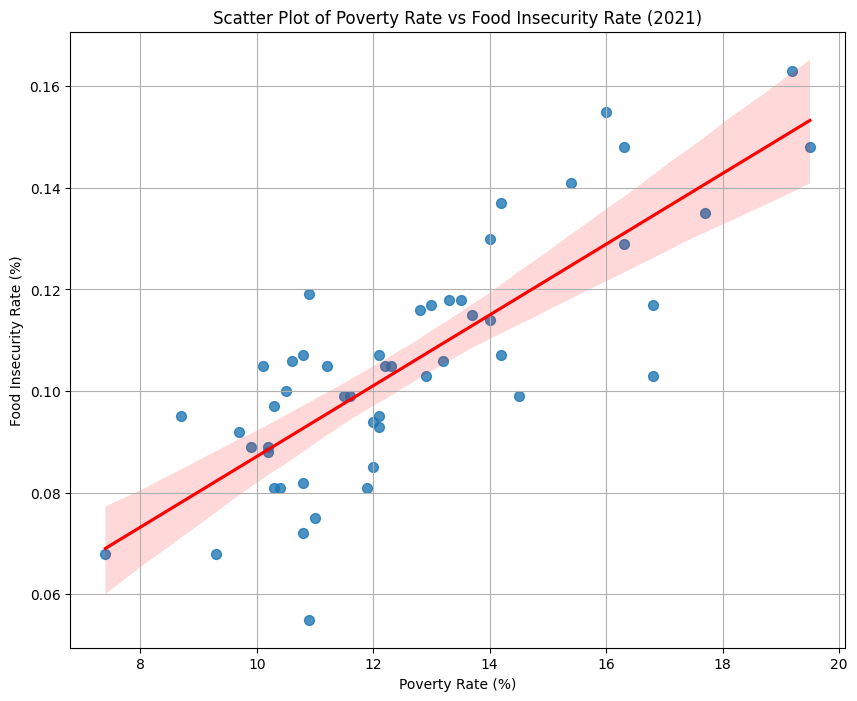

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming poverty_df and insecurity_df are already loaded

# Merge dataframes on State and Year
merged_df = pd.merge(poverty_df, insecurity_df, how='inner', left_on=['State', 'Year'], right_on=['State', 'Year'])

# Create a scatter plot with a trendline
plt.figure(figsize=(10, 8))
sns.regplot(x='PCTPOVALL_2021', y='Overall Food Insecurity Rate', data=merged_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('Scatter Plot of Poverty Rate vs Food Insecurity Rate (2021)')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Food Insecurity Rate (%)')
plt.grid(True)
plt.show()


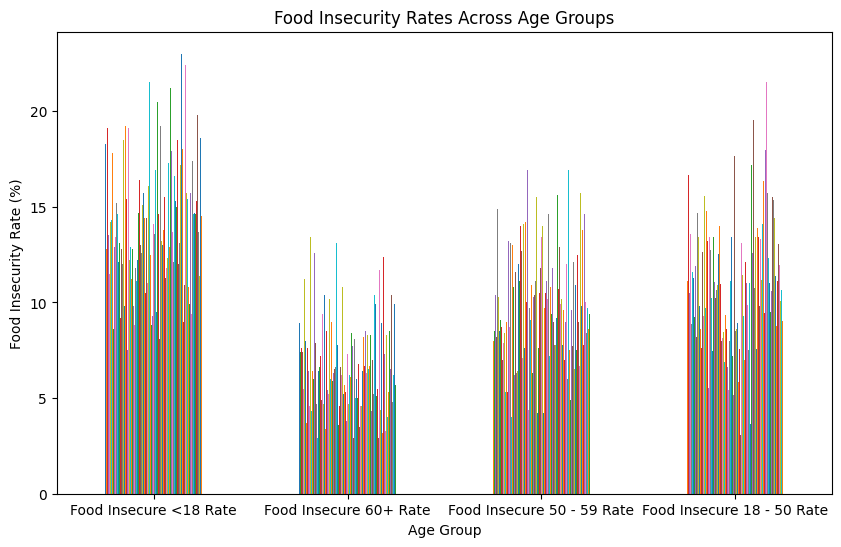

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming insecurity_df is already loaded

# Replace column names with the actual names in your DataFrame
age_groups_df = insecurity_df[['Year', 'Food Insecure <18 Rate', 'Food Insecure 60+ Rate', 'Food Insecure 50 - 59 Rate', 'Food Insecure 18 - 50 Rate']]

# Set 'Year' column as the index
age_groups_df.set_index('Year', inplace=True)

# Transpose the DataFrame for better plotting
transposed_df = age_groups_df.transpose()

# Convert percentage strings to numeric values
transposed_df = transposed_df.apply(lambda x: pd.to_numeric(x.str.rstrip('%'), errors='coerce'))

# Plot a bar chart without legend
transposed_df.plot(kind='bar', figsize=(10, 6), rot=0, legend=False)
plt.title('Food Insecurity Rates Across Age Groups ')
plt.xlabel('Age Group')
plt.ylabel('Food Insecurity Rate (%)')

plt.show()
